# Final Project.- Training a Machine Learning model on medical images.

Team:


*   Alessandra Nayeli Arenas Escalante — 1994279 — N2
*   Andrea Victoria Carrizosa Bernal — 2049922 — N2


*   Diego Iván Sánchez Vargas — 2132200 — N2
*   Perla Rubí Rodriguez Trejo — 1997169 — N2


Class: AI

Professor: Daniel Isaías López Páez

Date: 21/11/2025

## Methodology

This cell imports all the essential libraries used for image processing, data handling, model building, and visualization. It prepares the environment so later cells can run without errors.

In [ ]:
import matplotlib.pyplot as ptl
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

This cell sets random seeds for NumPy and TensorFlow to ensure reproducible results every time the code is executed.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

Kaggle’s API is installed and the upload utility from Colab is imported, enabling authentication and dataset downloads.

In [ ]:
!pip install kaggle -q
from google.colab import files

A file-upload window appears so the user can provide the kaggle.json credentials needed for Kaggle access.

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"perlarodriguezt","key":"5e5d57173d108a5f825d3a3311ad3c75"}'}

The Kaggle credentials are placed in the correct directory and given proper permissions so the API can be used securely.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The MRI brain tumor dataset is downloaded directly from Kaggle using the previously configured authentication.

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


The downloaded ZIP file is extracted into a folder, making the dataset accessible for loading and preprocessing.

In [ ]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/brain-mri-images-for-brain-tumor-detection.zip'

# Carpeta donde se descomprimirá
extracted_folder_path = '/content/BrainMRI'

# Descomprimir
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

Two empty lists are created to store the processed images and their corresponding labels.

In [ ]:
imagenes=[]
etiquetas=[]

All images in the dataset are read, converted to grayscale, resized to 64×64, and stored along with their class label. File paths are printed as a simple check that everything is being read correctly.

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/BrainMRI/brain_tumor_dataset'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z=0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)

        for x in glob.iglob(f'{subcarpeta}/*'):
          print(x)
          test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)

          if test_image is None:
              continue

          # Formato de imagen
          img_resized = cv2.resize(test_image, (64,64))

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          arreglo_imagen=np.expand_dims(arreglo_imagen, axis=-1)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

Subcarpeta: /content/BrainMRI/brain_tumor_dataset/no
/content/BrainMRI/brain_tumor_dataset/no/No19.jpg
/content/BrainMRI/brain_tumor_dataset/no/No20.jpg
/content/BrainMRI/brain_tumor_dataset/no/9 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/35 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/No18.jpg
/content/BrainMRI/brain_tumor_dataset/no/25 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/No15.jpg
/content/BrainMRI/brain_tumor_dataset/no/12 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/46 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/no 4.jpg
/content/BrainMRI/brain_tumor_dataset/no/13 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/14 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/5 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/no 9.png
/content/BrainMRI/brain_tumor_dataset/no/no 10.jpg
/content/BrainMRI/brain_tumor_dataset/no/N16.jpg
/content/BrainMRI/brain_tumor_dataset/no/27 no.jpg
/content/BrainMRI/brain_tumor_dataset/no/no 8.jpg
/content/BrainMRI/brain_tumor_dataset/no

Images and labels are converted into NumPy arrays, and their shapes are printed to confirm the dataset loaded properly.

In [ ]:
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)
print(imagenes.shape)
print(etiquetas.shape)

(253, 64, 64, 1)
(253,)


## Preprocessing

One of the loaded images is displayed to visually confirm that the preprocessing worked as expected.

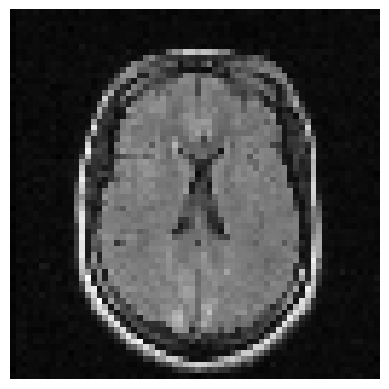

In [ ]:
ptl.imshow(imagenes[0], cmap='gray')
ptl.axis('off')
ptl.show()

The dataset is divided into training and testing sets, reserving 20% of the images for evaluation.

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    imagenes, etiquetas, test_size=0.2, shuffle=True)

In the following cells, the shape of the training image set is printed to check how many samples are included. The number of labels in the training set is also displayed. Then, all training labels are printed as a quick verification step.
The shape of the test images is shown to confirm the size of the evaluation set and lastly the number of test labels is displayed.

In [ ]:
train_images.shape

(202, 64, 64, 1)

In [ ]:
len(train_labels)

202

In [ ]:
train_labels

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1])

In [ ]:
test_images.shape

(51, 64, 64, 1)

In [ ]:
len(test_labels)

51

Pixel values are normalized by dividing by 255.0, helping the neural network train more effectively.

In [ ]:
# Normalization of pixel values.
train_images = train_images / 255.0
test_images = test_images / 255.0

## Structure and training of convolutional artificial neural network (CNN)

The convolutional part of the CNN is defined, including layers for feature extraction through convolution and pooling.

In [ ]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Dense layers responsible for interpreting extracted features and producing the binary classification output are added.

In [ ]:
# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

The model is then compiled with the Adam optimizer, a binary crossentropy loss function, and accuracy as the evaluation metric.

In [ ]:
# Model Compliation: Features
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training begins for ten epochs, generating a history that tracks both training and validation performance.

In [ ]:
# CNN training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9610 - loss: 0.1189 - val_accuracy: 0.8627 - val_loss: 0.2976
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.9973 - loss: 0.0534 - val_accuracy: 0.8824 - val_loss: 0.2638
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 1.0000 - loss: 0.0380 - val_accuracy: 0.8431 - val_loss: 0.5780
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.9020 - val_loss: 0.3462
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.8824 - val_loss: 0.4188
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.8431 - val_loss: 0.3636
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.8824 - val_loss: 0.4186
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8824 - val_loss:

## CNN Accuracy Results

This cell generates a graph of the accuracy achieved during training and compares it to the accuracy of the validation set. Finally, the model is also evaluated to determine its final accuracy and loss, allowing us to assess how well it generalizes.

2/2 - 0s - 46ms/step - accuracy: 0.8627 - loss: 0.4881


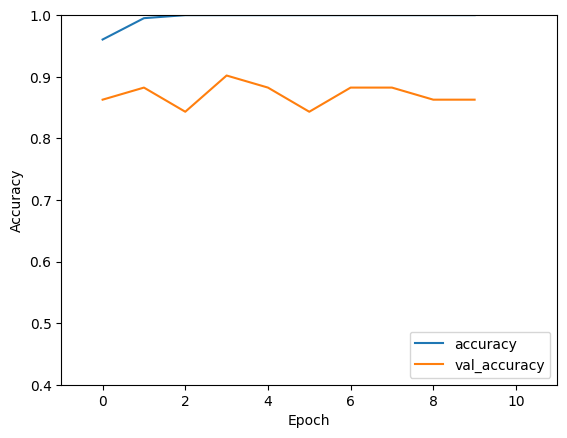

In [ ]:
# Plot with the difference in accuracy values from training and validation.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Predictions with the trained CNN

This is where the predictions of the already trained model are generated using all the images in the test set. This cell doesn't display anything directly, but it creates the array of predictions.

In [ ]:
predictions = model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


This last cell prints the first ten predictions made by the neural network and compares them to their actual labels. It also displays each image along with its corresponding prediction, allowing for a visual interpretation of the model's performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: 1  |  Actual: 1


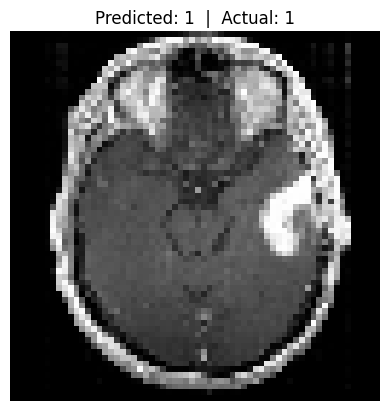

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: 0  |  Actual: 0


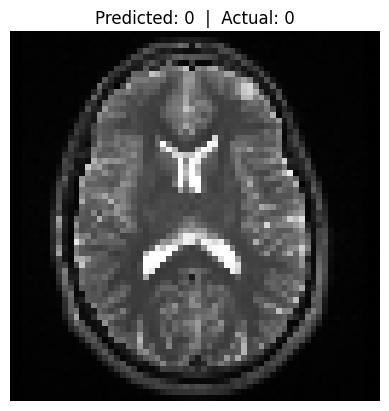

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 0  |  Actual: 0


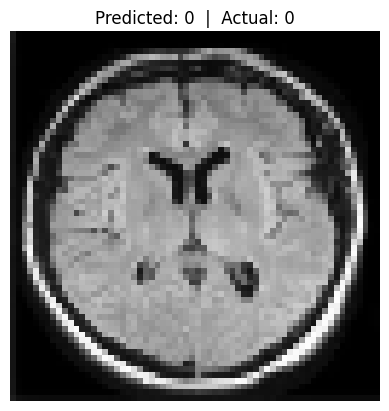

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 1  |  Actual: 1


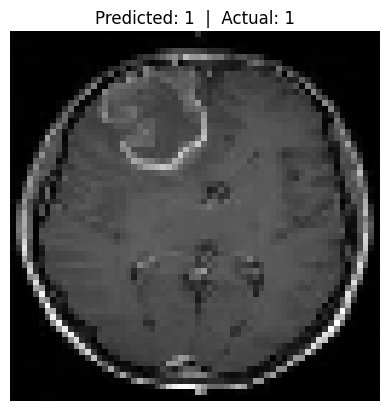

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: 1  |  Actual: 1


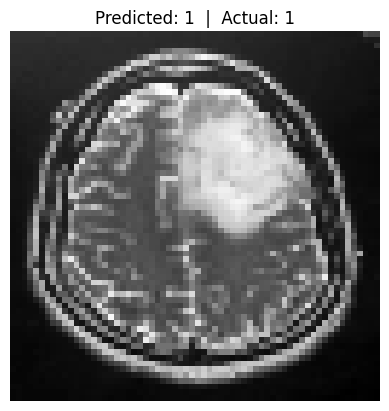

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: 1  |  Actual: 1


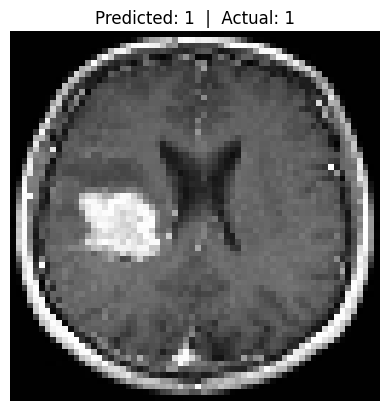

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: 1  |  Actual: 1


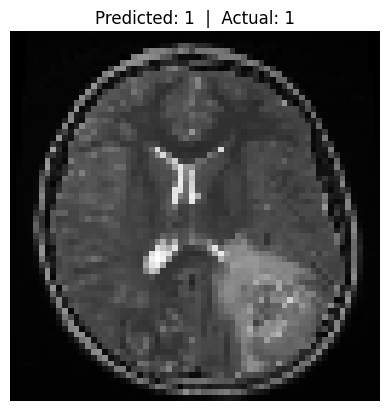

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: 1  |  Actual: 1


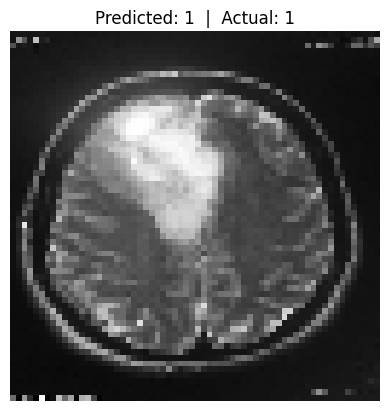

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 0  |  Actual: 0


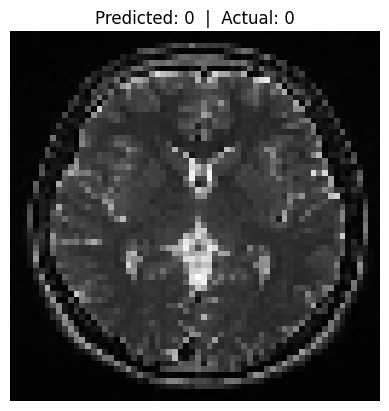

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: 0  |  Actual: 0


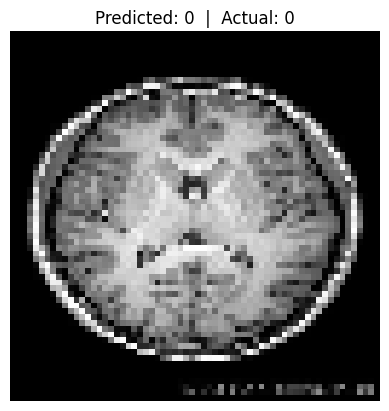

In [ ]:
for i in range(10):
    pred_prob = model.predict(test_images[i:i+1])[0][0]
    pred_class = 1 if pred_prob >= 0.5 else 0
    actual = test_labels[i]

    print(f"Prediction: {pred_class}  |  Actual: {actual}")

    # Mostrar la imagen
    plt.imshow(test_images[i], cmap="gray")
    plt.title(f"Predicted: {pred_class}  |  Actual: {actual}")
    plt.axis("off")
    plt.show()